# Анализ маркетинговых метрик .

**Цель исследования:**

- определить характеристики пользователей приложения;
- оценить окупаемость рекламных расходов и найти причины убытков;
- наметить ориентиры для новых маркетинговых кампаний.

Ничего не известно о качестве данных, поэтому для начала необходимо оценить их полноту и исправить ошибки.
Перед нами выгрузка логов сервера с данными об их посещениях, выгрузка покупок пользоваелей за этот период, рекламные расходы. 

***Описание данных:***

Структура visits.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

**Анализ будет включать в себя следующие этапы:**
- Загрузка и знакомство с данными
- Предобработка
- Создание профилей пользователей
- Исследование данных по регионам, устройствам, рекламным источникам
- Исследование маркетинговых расходов
- Расчет показателей окупаемости рекламных кампаний
- Общий вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-данные-и-подготовим-их-к-анализу" data-toc-modified-id="Загрузим-данные-и-подготовим-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим данные и подготовим их к анализу</a></span></li><li><span><a href="#Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span><ul class="toc-item"><li><span><a href="#get_profiles-(функция-для-создания-пользовательских-профилей)" data-toc-modified-id="get_profiles-(функция-для-создания-пользовательских-профилей)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>get_profiles (функция для создания пользовательских профилей)</a></span></li><li><span><a href="#get_retention-(функция-для-расчёта-удержания)" data-toc-modified-id="get_retention-(функция-для-расчёта-удержания)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>get_retention (функция для расчёта удержания)</a></span></li><li><span><a href="#get_conversion-(функция-для-расчёта-конверсии)" data-toc-modified-id="get_conversion-(функция-для-расчёта-конверсии)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>get_conversion (функция для расчёта конверсии)</a></span></li><li><span><a href="#get_ltv-(функция-для-расчёта-LTV-и-ROI)" data-toc-modified-id="get_ltv-(функция-для-расчёта-LTV-и-ROI)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>get_ltv (функция для расчёта LTV и ROI)</a></span></li><li><span><a href="#filter_data-(функция-для-сглаживания-фрейма)" data-toc-modified-id="filter_data-(функция-для-сглаживания-фрейма)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>filter_data (функция для сглаживания фрейма)</a></span></li><li><span><a href="#plot_retention-(функция-для-визуализации-удержания)" data-toc-modified-id="plot_retention-(функция-для-визуализации-удержания)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>plot_retention (функция для визуализации удержания)</a></span></li><li><span><a href="#plot_conversion-(функция-для-визуализации-конверсии)" data-toc-modified-id="plot_conversion-(функция-для-визуализации-конверсии)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>plot_conversion (функция для визуализации конверсии)</a></span></li><li><span><a href="#plot_ltv_roi-(функция-для-визуализации-LTV-и-ROI)" data-toc-modified-id="plot_ltv_roi-(функция-для-визуализации-LTV-и-ROI)-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>plot_ltv_roi (функция для визуализации LTV и ROI)</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Профили-пользователей" data-toc-modified-id="Профили-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Профили пользователей</a></span></li><li><span><a href="#Пользователи-в-разрезе-стран" data-toc-modified-id="Пользователи-в-разрезе-стран-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Пользователи в разрезе стран</a></span></li><li><span><a href="#Пользователи-в-разрезе-устройств" data-toc-modified-id="Пользователи-в-разрезе-устройств-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Пользователи в разрезе устройств</a></span></li><li><span><a href="#Рекламные-источники" data-toc-modified-id="Рекламные-источники-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Рекламные источники</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Общие-расходы-на-рекламу" data-toc-modified-id="Общие-расходы-на-рекламу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Общие расходы на рекламу</a></span></li><li><span><a href="#Динамика-изменения-расходов-во-времени" data-toc-modified-id="Динамика-изменения-расходов-во-времени-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Динамика изменения расходов во времени</a></span></li><li><span><a href="#Стоимость-привлечения-пользователей-в-разрезе-источников." data-toc-modified-id="Стоимость-привлечения-пользователей-в-разрезе-источников.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Стоимость привлечения пользователей в разрезе источников.</a></span></li></ul></li><li><span><a href="#Оценим-окупаемость-рекламы" data-toc-modified-id="Оценим-окупаемость-рекламы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценим окупаемость рекламы</a></span><ul class="toc-item"><li><span><a href="#Окупаемость-рекламы" data-toc-modified-id="Окупаемость-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Окупаемость рекламы</a></span></li><li><span><a href="#Конверсия-и-удержание" data-toc-modified-id="Конверсия-и-удержание-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Конверсия и удержание</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-устройствам" data-toc-modified-id="Окупаемость-с-разбивкой-по-устройствам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Окупаемость с разбивкой по устройствам</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-странам" data-toc-modified-id="Окупаемость-с-разбивкой-по-странам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Окупаемость с разбивкой по странам</a></span></li><li><span><a href="#Окупаемость-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Окупаемость-с-разбивкой-по-рекламным-каналам-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Окупаемость с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Детализация-конверсии-и-удержания" data-toc-modified-id="Детализация-конверсии-и-удержания-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Детализация конверсии и удержания</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

### Загрузим данные и подготовим их к анализу

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.
Изучим данные и выполним предобработку - есть ли в данных пропуски и дубликаты, убедимся, что типы данных во всех колонках соответствуют сохранённым в них значениям.

Загрузим библиотеки для анализа.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import date, datetime, timedelta

Загружаем данные.

In [2]:
try:
    visits = pd.read_csv('/datasets/________.csv')
    orders = pd.read_csv('/datasets/________.csv')
    costs = pd.read_csv('/datasets/_________.csv')
except:
    visits = pd.read_csv('https://__________.csv')
    orders = pd.read_csv('https://__________.csv')
    costs = pd.read_csv('https://___________.csv')

Ознакомимся с внешним видом полученных таблиц.

In [3]:
display(visits)
display(orders)
costs

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


Таблица visits хранит информацию о логах сервера о посещениях сайта и включает более 309 тыс.записей и 6 колонок- id пользователя, регион, устройство, дата/время начала и онончания сеанса, а также источник, с которого перешли на сайт. Таблица orders соответсвенно хранит информацию по заказам и состоит из более 40 тыс.строк и 3 колонок- идентификатор пользователя, дату и время покупки, а также сумму. Последння таблица costs включает информацию по рекламным расходам, канале и дате, она содержит 1800 записей и 3 колонки. Для начала переведем названия колонок для удобства в змеиный регистр.

In [4]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower() 

Посмотрим, что получилось, а также проверим таблицы на пропуски и оценим, нужно ли изменить тип данных.

In [5]:
display(visits.info(), orders.info(), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

None

None

None

Мы успешно периименовали колонки, пропусков не наблюдается, но следует изменить тип данных. В таблице с посещениями заменим тип данных для девайса, регион и канал на категориальный и преобразуем данные о времени.В таблице с пользователями также преобразуем дату и время в соответствующий тип. А таблицу с расходами исправим в части типа данных колонки с каналими (заменим на категориальные данные) и дате дадим соотвествующий тип. Проверим сначала уникальные названия устройств и каналов трафика для таблицы с визитами.

In [6]:
display(visits['device'].unique(),
        sorted(costs['channel'].unique()),
        sorted(visits['channel'].unique()),
        sorted(visits['region'].unique()))


array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds']

['AdNonSense',
 'FaceBoom',
 'LeapBob',
 'MediaTornado',
 'OppleCreativeMedia',
 'RocketSuperAds',
 'TipTop',
 'WahooNetBanner',
 'YRabbit',
 'lambdaMediaAds',
 'organic']

['France', 'Germany', 'UK', 'United States']

Список значений для выбранных категориальных данных действительно достаточно ограниченный, дубликатов в названиях нет, можно переводить в категории. 

In [7]:
#перевод в категориальный тип данных
visits = visits.astype({'device':'category', 'region':'category', 'channel':'category'})

costs['channel'] = costs['channel'].astype('category')


In [8]:
# изменим тип данных для столбцов с датой и временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Теперь проверим, что у нас получилось после изменения типов и проверим на дубликаты.

In [9]:
display(visits.info())
display(orders.info())
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  category      
 2   device         309901 non-null  category      
 3   channel        309901 non-null  category      
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(1)
memory usage: 8.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   dt       1800 non-null   object  
 1   channel  1800 non-null   category
 2   costs    1800 non-null   float64 
dtypes: category(1), float64(1), object(1)
memory usage: 30.4+ KB


In [10]:
display(
    'Количество дубликатов в таблице visits {}'.format(visits.duplicated().sum()),
    'Количество дубликатов в таблице orders {}'.format(orders.duplicated().sum()),
    'Количество дубликатов в таблице costs {}'.format(costs.duplicated().sum())
)


'Количество дубликатов в таблице visits 0'

'Количество дубликатов в таблице orders 0'

'Количество дубликатов в таблице costs 0'

Таким образом, мы проверили данные на пропуски, на дубликаты (как явные, так и дубликаты в категориальных данных) -дубликатов и пропусков не обнаружено. Типы данных привели к соотвествующим типам -дате и времени, категориальным, а также изменили названия колонок для удобства работы.

Пользователи  заходят с четырех видов устройств (iPhone, Mac, Android, PC) и представлены четырьмя странами - Франция, США, Германия, Великобритания. Источников трафика 11, включая органический и соответсвенно 10 рекламных источников.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Создадим функции для дальнейшей работы с данными.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### get_profiles (функция для создания пользовательских профилей)

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### get_retention (функция для расчёта удержания)

In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_conversion (функция для расчёта конверсии)

In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### get_ltv (функция для расчёта LTV и ROI)

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### filter_data (функция для сглаживания фрейма)

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### plot_retention (функция для визуализации удержания)

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### plot_conversion (функция для визуализации конверсии)

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### plot_ltv_roi (функция для визуализации LTV и ROI)

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.ylabel('У.е')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Поитогам, мы имеем фннкцию для составления профилей get_profiles,  для расчета удержания get_retention, конверсии - get_conversion. Для расчета LTV и ROI будем использовать функцию get_ltv, a для расчета скользящего среднего при визуализации функцию filter_data. Визуализировать будем с помощью функций plot_retention, plot_ltv_roi и plot_conversion.

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.



#### Профили пользователей

Составим профили пользователей, вызвав соответствующую функцию.

In [19]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Для начала нужно определить минимальную и максимальную даты привлечения пользователей.

In [20]:
display(
    'Максимальная дата привлечения {}, минимальная дата привлечения {}'
    .format(profiles['first_ts'].max(), profiles['first_ts'].min()))


'Максимальная дата привлечения 2019-10-27 23:59:04, минимальная дата привлечения 2019-05-01 00:00:41'

Период соответсвует необходимому для анализа (компания терпит убытки уже несколько месяцев), момент анализа в ТЗ - 1 ноября, горизонт анализа 2 недели, соответсвенно сможем выделить достаточное количество когорт

#### Пользователи в разрезе стран

In [21]:
region = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
region.columns = ['users', 'payers', 'share']
region

,users,payers,share
region,,,
France,17450,663,0.037994
Germany,14981,616,0.041119
UK,17575,700,0.039829
United States,100002,6902,0.069019


Пользватели приходят в приложение из 4х стран - Франции, Германии, Вликобритании и США. Больше всего платящих пользователей в США, и доля платящих в США самая высокая - 6,9%. Самая низкая доля платящих пользователей во Франции - 3,8%, а самое низкое число плательщиков , как и привлеченных пользователей в Германии - 14981 уникальный посетитель и 616 платящих соотвественно.

#### Пользователи в разрезе устройств

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [22]:
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device.columns = ['users', 'payers', 'share']
pd.set_option('display.float_format', '{:.2f}'.format)
device


,users,payers,share
device,,,
Android,35032,2050,0.06
Mac,30042,1912,0.06
PC,30455,1537,0.05
iPhone,54479,3382,0.06


Большее количество пользователей приложения используют айфоны - 54479 чел. На втором месте андроид-устройства -35тыс.пользователей. А вот на компьютерах, в том числе на mac os приложение пользуется меньшей популярностью  - по 30 тыс пользователей у PC и Mac. Платящие клиенты предпочитают айфон  - 3382 платящих пользователя на этом виде устройств и 6,2% доля платящих от общего количества пользователей, заходящих в приложение с айфона.

#### Рекламные источники

In [23]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channel.columns = ['users', 'payers', 'share']
channel.sort_values(by='payers', ascending =False)

,users,payers,share
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


Как мы отмечали ранее, всего 11 источников привлечения, включая органический (он в свою очередь имеет самую низкую долю платящих пользователей - 2% от количества таких пользователей совершают затем покупку, но по количеству привлеченных пользователей это самый активный источник.  Из рекламных источников на первом месте по привлечению FaceBoom(более 29тыс.чел), на втором месте TipTop (19,5 тыс.) и на третьем можно выделить 3 источника, привлекшие по 8,6 тысяч пользователей - WahooNetBanner, LeapBob, OppleCreativeMedia.

Больше всего платящих пользователей пришло из FaceBoom (он же имеет самую высокую долю платящих среди пользователей, принедших из данного канала - более 12%). TipTop на втором месте по количеству платящих - 1878 пользователей совершили покупку (т.е. 9,6%). А на третьем месте органический приток пользователей  - 1160 платящих (не смотря на самую низкую долю платящих среди всех категорий).

Таким образом,самое популярное устройство среди пользователей приложения(на нем же совершается большее количество покупок) - айфон. Больше всего пользователей приложения в США. А основной источник привлечения платных пользователей - FaceBoom. 

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

#### Общие расходы на рекламу

Посчитаем общие расходы на рекламу, а также расходы в разрезе источников.

In [24]:
pd.pivot_table(costs,
               index='channel',
               values='costs',
               aggfunc='sum',
               margins=True,
               margins_name='Sum')


,costs
channel,
AdNonSense,3911.25
FaceBoom,32445.60
LeapBob,1797.60
MediaTornado,954.48
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
TipTop,54751.30
WahooNetBanner,5151.00
YRabbit,944.22


Таким образом, общие расходы составили 105 тыс.у.е. И самыми дорогостоящими были рекламные кампании в TipTop(55 тыс.у.е.) и FaceBoom (32 тыс.у.е.).

#### Динамика изменения расходов во времени

Добавим столбцы с неделями и месяцами для оценки динамики расходов.

In [25]:
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')

Визуализаируем динамику изменения по неделям.

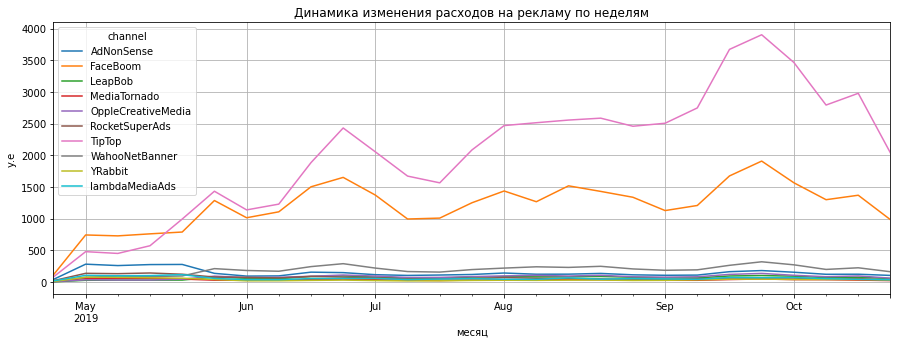

In [26]:
costs.pivot_table(
    index='week',  
    columns='channel',
    values='costs', 
    aggfunc='sum'  
).plot(figsize=(15, 5), grid=True,)
plt.title('Динамика изменения расходов на рекламу по неделям')
plt.ylabel('у.е')
plt.xlabel('месяц')

plt.show()

Мы видим пики активености по основному крупному источнику привлечения (TipTop)  последние недели месяца -в мае, июле,августе и октябре, по  FaceBoom наблюдаем активность также в эти периоды. Посмотрим более укрупненно -динамику по месяцам.

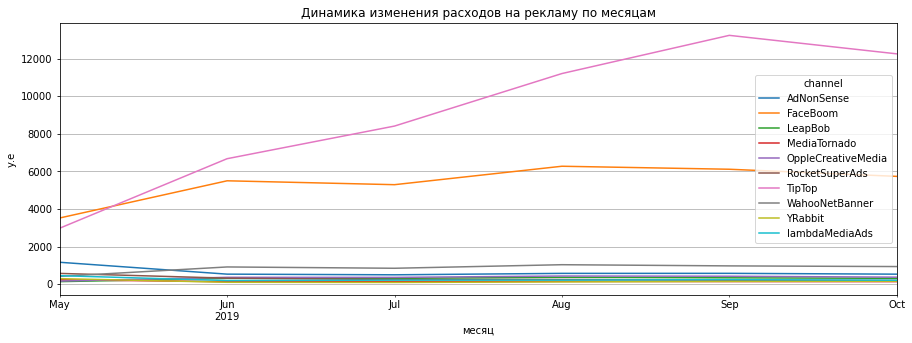

In [27]:
costs.pivot_table(
    index='month',  
    columns='channel',
    values='costs', 
    aggfunc='sum'  
).plot(figsize=(15, 5), grid=True,)
plt.title('Динамика изменения расходов на рекламу по месяцам')
plt.ylabel('у.е')
plt.xlabel('месяц')

plt.show()

Cамыми затратными с точки зрения стоимости рекламы были два источника переходов - TipTop и FaceBoom. Ежемесячные расходы на FaceBoom примерно одинаковы -  около 6 тыс.у.е. А вот расходы на TipTop росли с каждым месяцем и в сентябре составили 13200 у.е. По остальным источникам график выглядит нерепрезентативным, выгрузим им отдельно от топовых каналов привлечения.

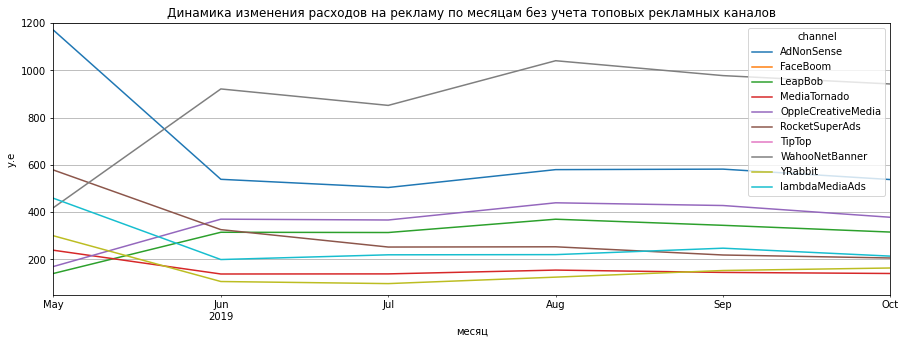

In [28]:
costs.query('(channel!="TipTop")&(channel!="FaceBoom")').pivot_table(
    index='month',  
    columns='channel',
    values='costs', 
    aggfunc='sum'  
).plot(figsize=(15, 5), grid=True,)
plt.title('Динамика изменения расходов на рекламу по месяцам без учета топовых рекламных каналов')
plt.ylabel('у.е')
plt.xlabel('месяц')
plt.ylim(50,1200)

plt.show()

Мы можем наблюдать, что по оставшимся(не топовым) источникам привлечения ежемесячные расходы с июня 2019 примерно не менялись. Стоит также отметить, что в июне существенно сокращены расходы на AdNonSense и выросли расходы по WahooNetBanner.

#### Стоимость привлечения пользователей в разрезе источников.

Посмотрим, сколько стоило привлечение одного пользователя (CAC) из каждого источника.

In [29]:
profiles.groupby('channel')['acquisition_cost'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
channel,,,,,,,,
TipTop,19561.00,2.80,0.75,0.94,2.54,3.00,3.50,3.72
FaceBoom,29144.00,1.11,0.02,1.05,1.10,1.11,1.12,1.18
AdNonSense,3880.00,1.01,0.06,0.79,0.98,1.00,1.05,1.31
lambdaMediaAds,2149.00,0.72,0.08,0.32,0.69,0.73,0.80,0.91
WahooNetBanner,8553.00,0.60,0.02,0.47,0.59,0.60,0.61,0.66
RocketSuperAds,4448.00,0.41,0.11,0.21,0.31,0.40,0.53,0.60
OppleCreativeMedia,8605.00,0.25,0.01,0.21,0.25,0.25,0.26,0.28
YRabbit,4312.00,0.22,0.05,0.12,0.18,0.21,0.26,0.32
MediaTornado,4364.00,0.22,0.02,0.17,0.21,0.22,0.23,0.27


Как мы видим, самая высокая стоимость привлечения одного пользователя через TipTop -2,8 у.е., а средняя стоимость привлечения через FaceBoom(еще один топовый канал привлечения по объему финансирования) 1.1 у.е. И в связи с тем, что мы видели восходящий тренд расходов на TipTop, среднеквадратичное отклонение САС достаточно высокое - 0.75 у.е. 

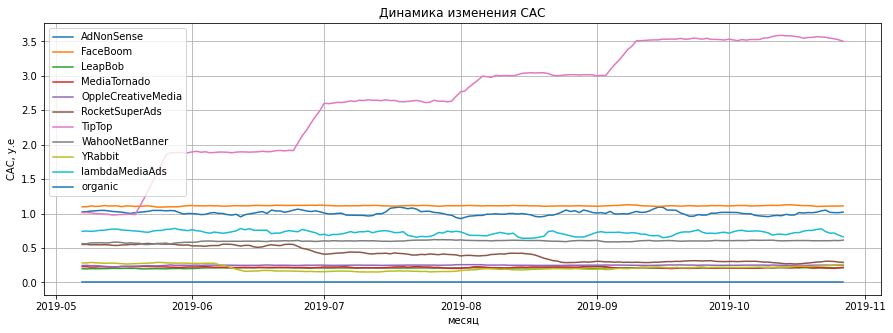

In [30]:
filter_data(
    profiles.pivot_table(index='dt',
                         columns='channel',
                         values='acquisition_cost',
                                aggfunc='mean'), 7
).plot(figsize=(15, 5), grid=True,)
plt.title('Динамика изменения САС')
plt.legend( loc='best')
plt.ylabel('САС, у.е')
plt.xlabel('месяц')

plt.show()

Как мы наблюдаем, при том, что расходы на рекламу у FaceBoom достаточно велики, стоимость привлечение одного пользователя не менялась и не сильно отличается от менее популярных каналов привлечения. А вот стоимость привлечения в TipTop мало того, что сама по себе высока, так и САС растет с каждым месяцем.

Итак, самыми дорогостоящими были рекламные кампании в TipTop(55 тыс.у.е.) и FaceBoom (32 тыс.у.е.), а общая стоимость рекламы через все каналы - 105,5 тысяч у.е.  Ежемесячные расходы на FaceBoom составляют около 6 тыс.у.е. А расходы на TipTop  каждым месяцем увеличиваются и в сентябре составили 13200 у.е. Стоит также отметить, что у TipTop и самыая высокая стоимость привлечения, САС привелечения через этот канал в среднем составляет 2,8 у.е, хотя в начале ислледуемого периода он составлял 1 у.е, т.е. примерно на том же уровне, что и FaceBoom и соответственно не сильно отличался от других каналов привлечения. Нам стоит оценить окупаемость рекламы и понять, насколько данные расходы обоснованы.

### Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучимграфики конверсии и удержания.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответим на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

#### Окупаемость рекламы

Посчитаем LTV и ROI, но для начала определим момент анализа как 1 ноября 2019 года, а горизонт в 14 дней. При этом не будем учитывать органический приток пользователей, т.к. он по определению не сопровождается доп.расходами.

In [31]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 
profiles1 = profiles.copy().query('~(channel == "organic")')

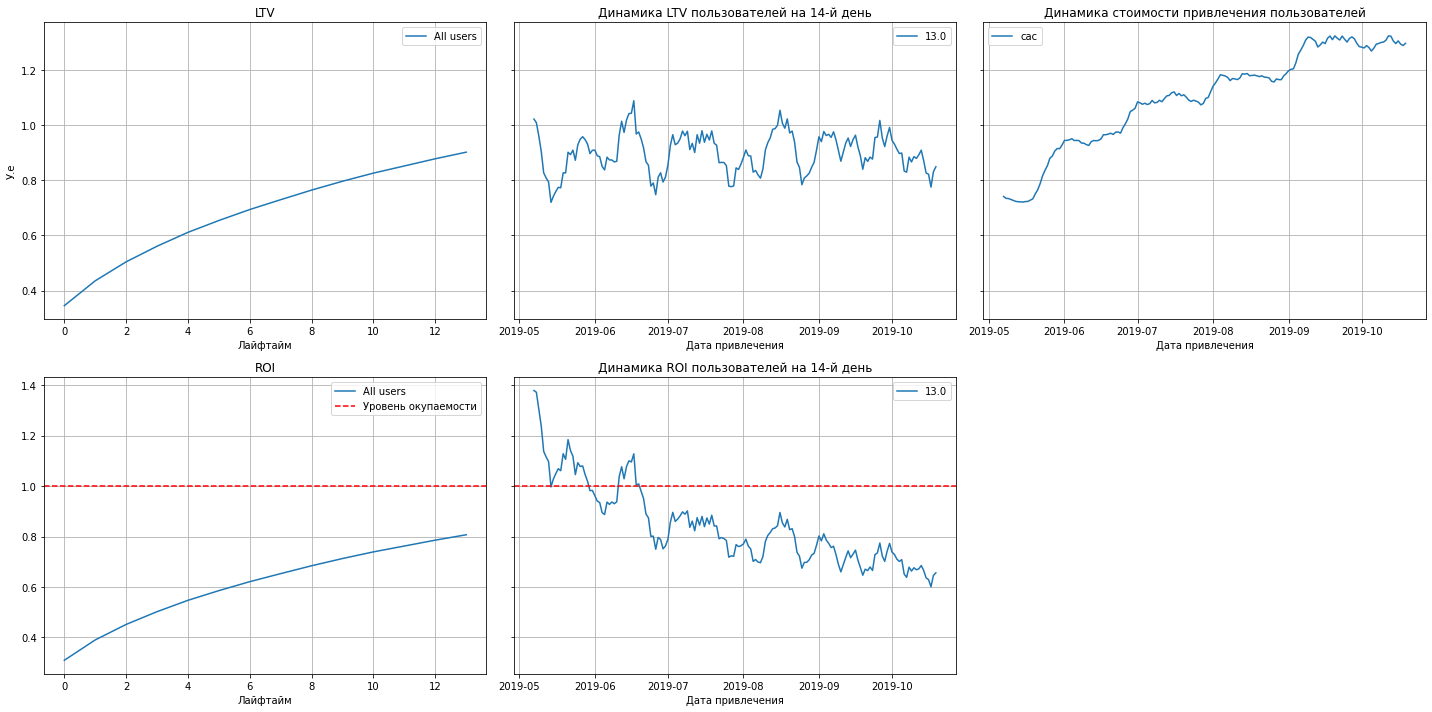

In [32]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days
)
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Пожизненная ценность клиента в конце двухнедельного цикла составляет менее 1 у.е, и в динамике этот показатель за последние полгода не то чтобы сильно растет - он колеблется о 0,8 до 1 у.е. При этом стоимость привлечения пользователей существенно выросла и достигла уже 1.3 у.е. Соответственно логично , что коэффициент окупаемости менее 1, а динамика ROI имеет нисходящую тенденцию. Нужно разбираться в причинах таких результатов.

#### Конверсия и удержание

Для начала посмотрим на графики конверсии.

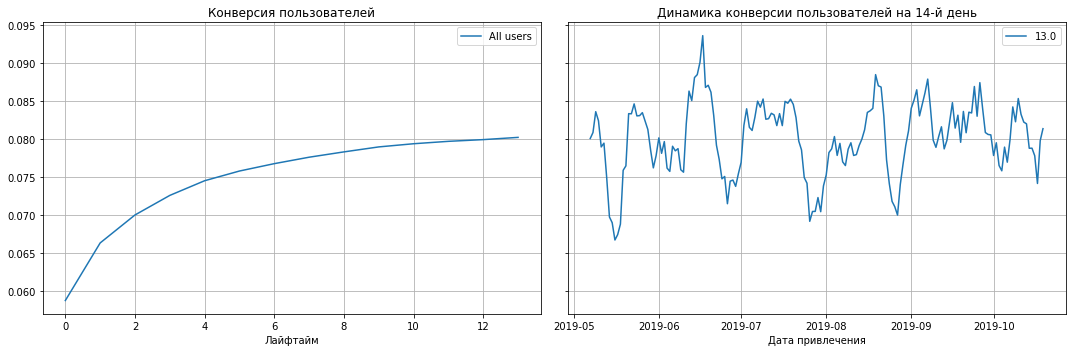

In [33]:
# смотрим конверсию

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)



В первые 5 дней конверсия растет, потом этот рост замедляется, и к концу жизненного цикла в две недели конверсия составляет 8%. К концу года динамика конверсии менее размашистая - показатель конверсии колеблится в пределах 7,5-8,5%. А самая высокая конверсия наблюдалась в середине июня. Далее нужно изучить удержане пользователей.

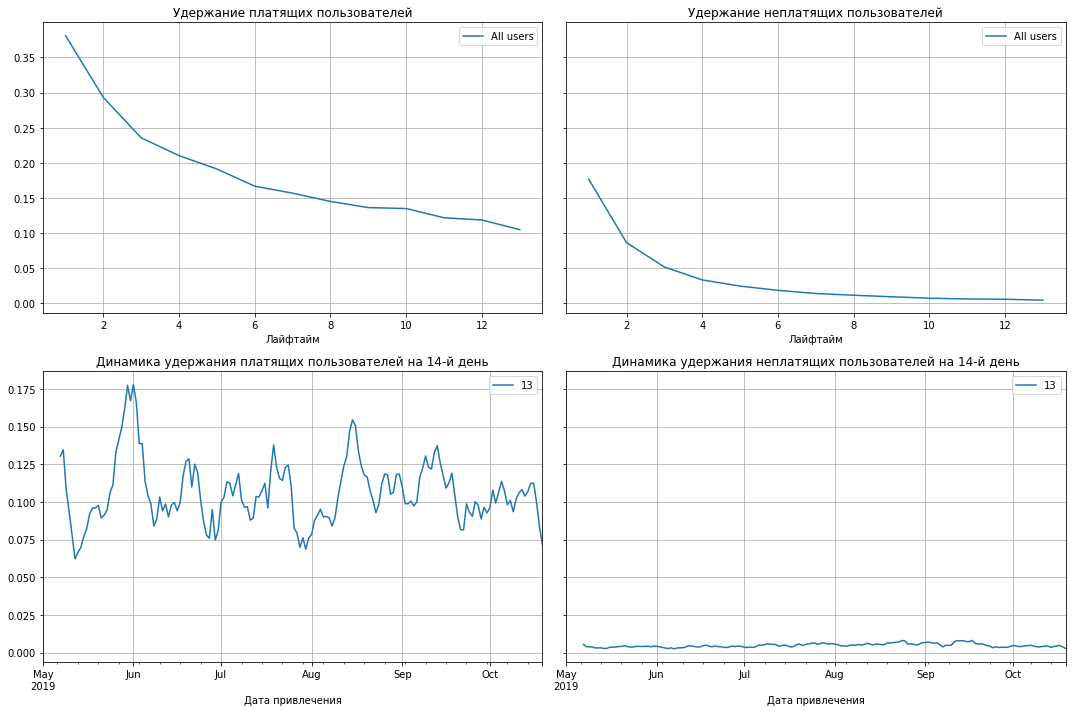

In [34]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days,)

plot_retention(retention_grouped, retention_history, horizon_days)

На графиках мы видим, как к концу года упало удержание платящих пользователей примерно до 10%. С неплатящими пользователями логично все стабильно. При этом в первые дни удержание платящих достигает 35%, а к 8 лайфтайму составляет 15%.

#### Окупаемость с разбивкой по устройствам

Посмтрим, влияет ли тип устройства на окупаемость рекламы.

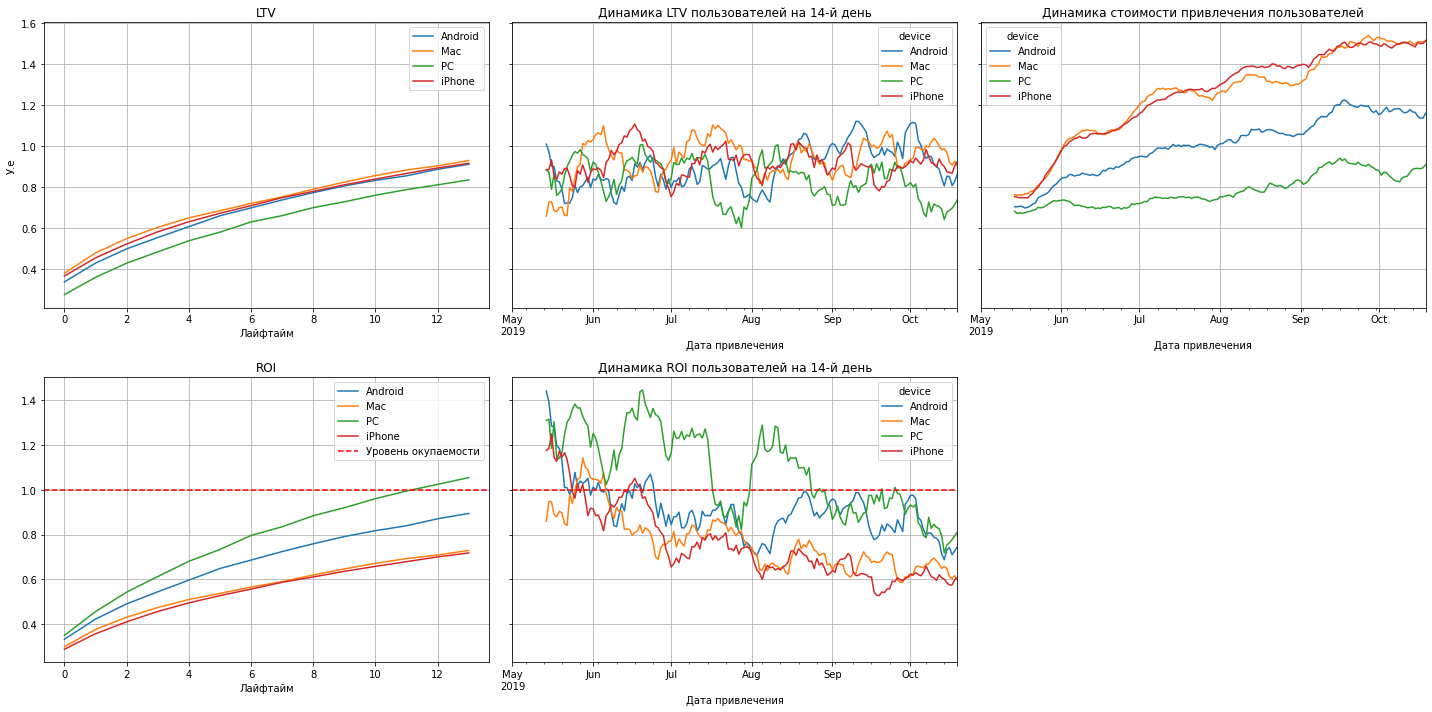

In [35]:
#смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Доход растет по всем типам устройств, в меньшей степени конечно же на ПК. Более того, есть провалы LTV  по пользователям ПК в конце июля и в ноябре. Но и стоимость привлечения пользователей на ПК в меньшей степени изменилась. В основном рост расходов на рекламу касались Mac и айфонов. В среднем окупились только пользователи на ПК, но к концу года и по ним получили убыток.

#### Окупаемость с разбивкой по странам

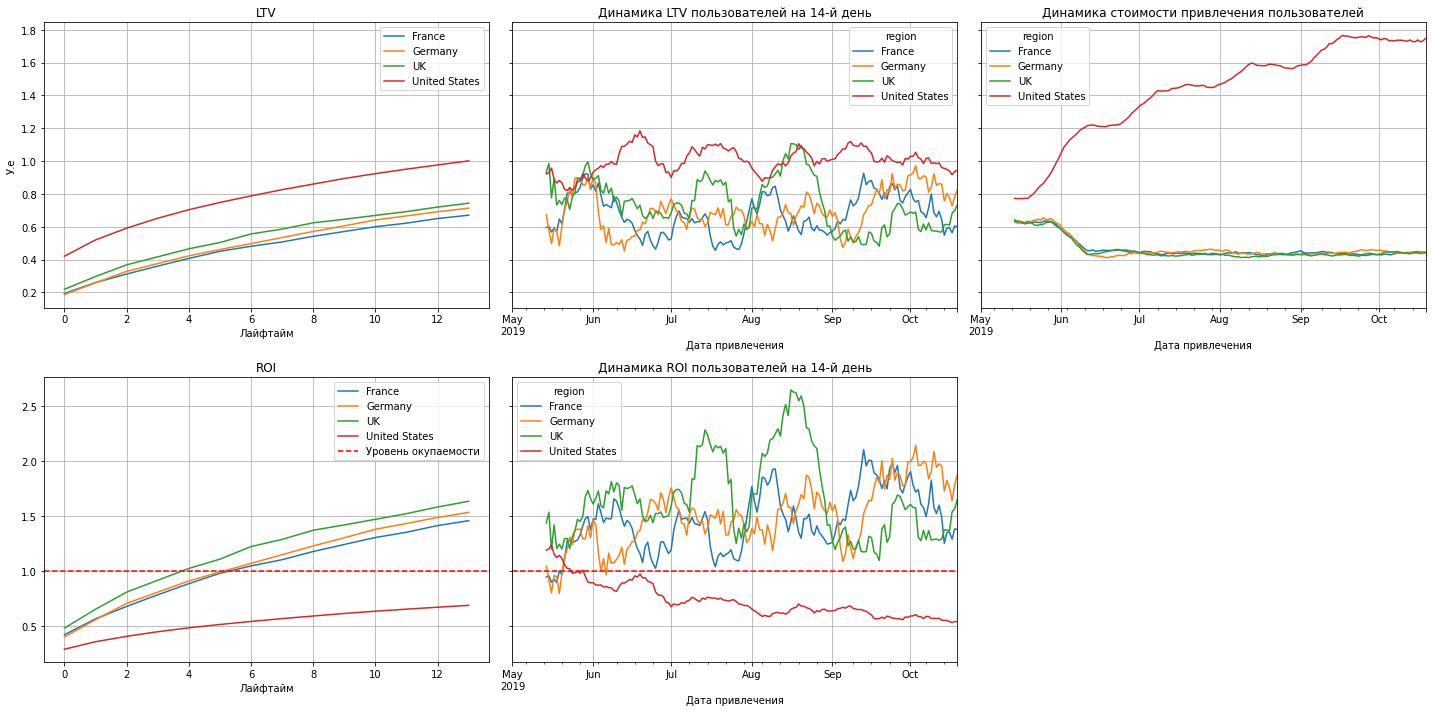

In [36]:
#смотрим окупаемость с разбивкой по странам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из графиков видим, что основные усилия были направлены на пользователей из США (а это на данный момент основные и самые многочисленные пользователи приложения). Да, доходы от них растут в течении жизненного цикла, но в динамике не превышают 1.2 у.е. на клиента. А вот стоимость их привлечения существенно выросла - до 1.8 у.е. И соответственно пользователи этого региона единственные, кто не окупается к концу двухнедельного цикла. По остальным странам можно сказать, что за весь анализируемый период они были рентабельными (в т.ч. окупаемость по пользователям из Германии стала выше и пересекла точку убыточности).

#### Окупаемость с разбивкой по рекламным каналам

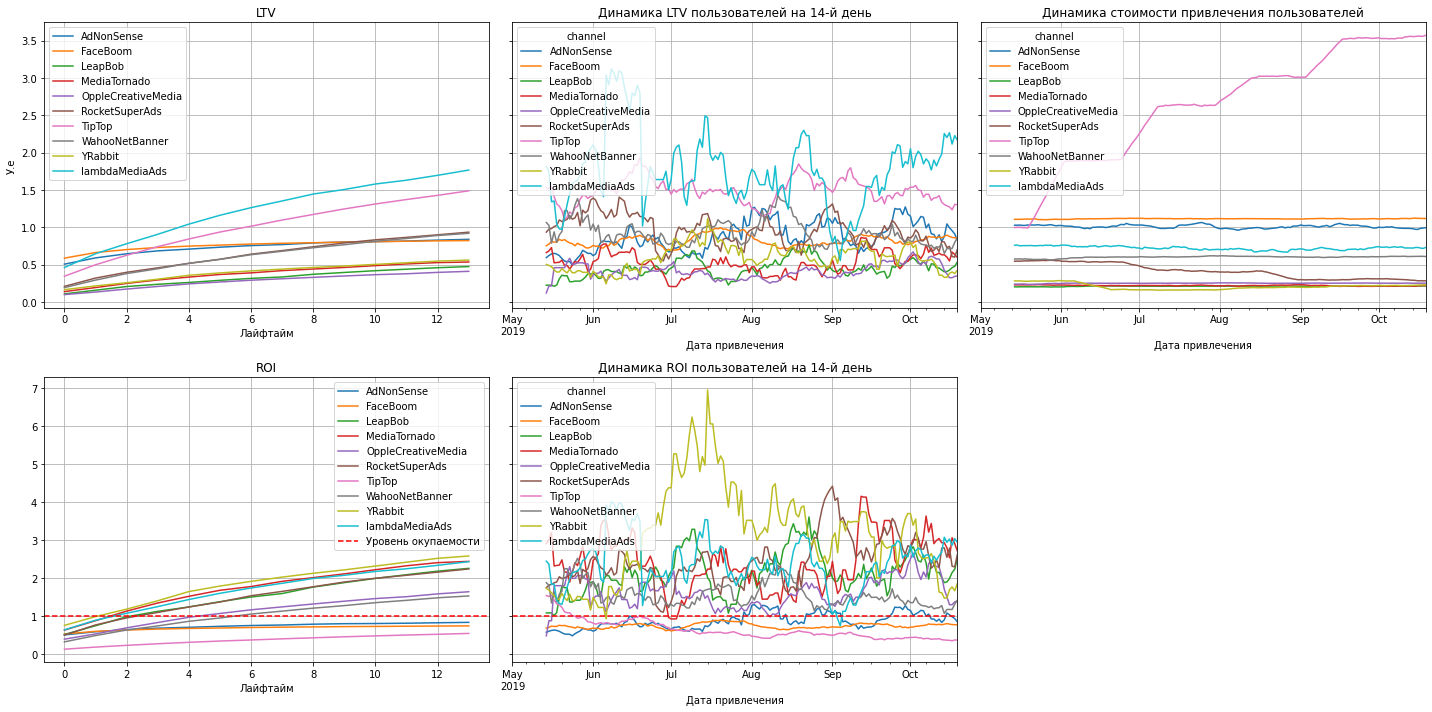

In [37]:
#смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Самый высокий доход приносят пользователи, пришедшие через lambdaMediaAds - на 14 день LTV составяет 1.75 у.е. TipTop на втором месте - 1.5 у.е. в среднем. Но вот расходы на привлечение через TipTop катастрофически выросли. В результате самые дорогие с точки зрения стоимости рекламы и общих затрат на рекламу каналы (TipTop и FAceBoom) единственные, так и не окупаются на 14 день лайфтайма. Стоит также обратить, что весьма успешны были расходы на рекламу в  YRabbit в середине июля -данный канал привлечения  имеет лучшие показатели ROI за полгода. lambdaMediaAds и MediaTornado также показывают неплохую рентабельность.

 У нас явные проблемы в US и TIp Top с Faceboom, при учете, что США - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы 

#### Детализация конверсии и удержания

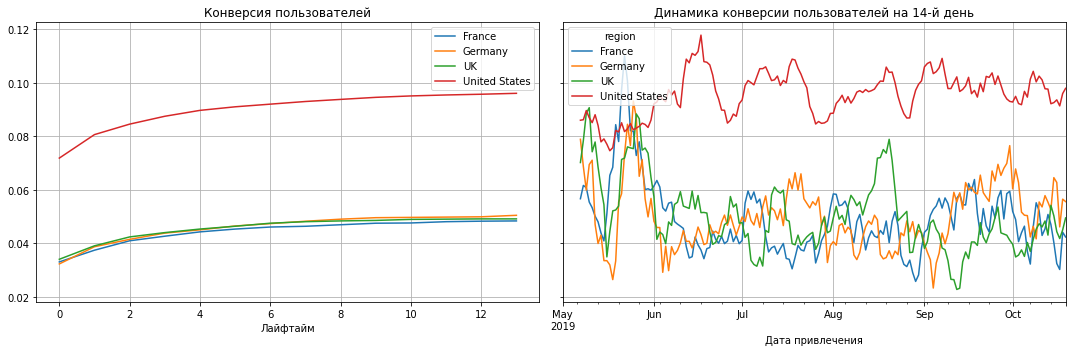

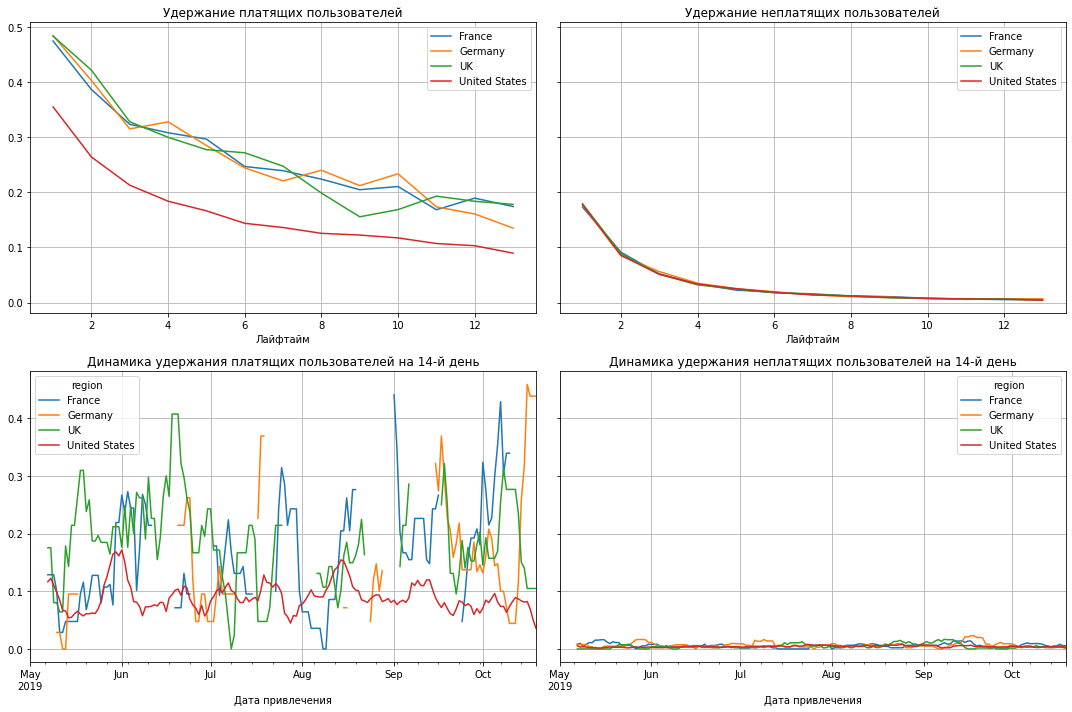

In [38]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У пользователей из США самая высокая конверсия (с учетом того, сколько вкладывалось в этом регионе в рекламу, неудивительно), а вот удержание платящих пользователей самое низкое. динамика конверсии по США становится с течением времени не такой волатильной.

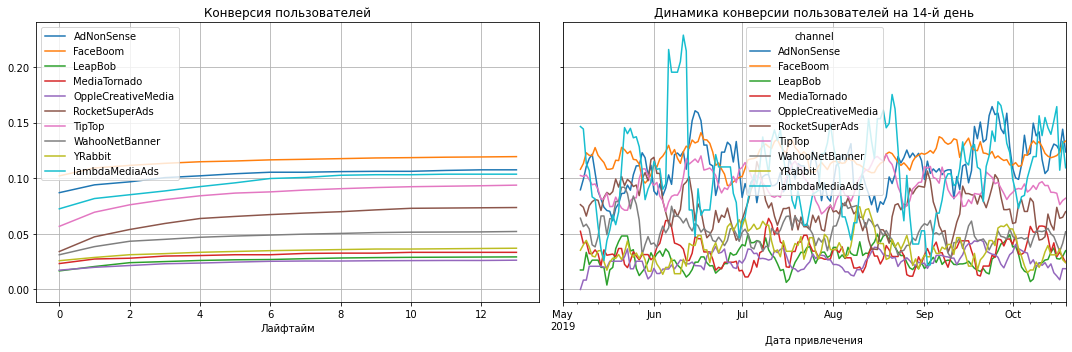

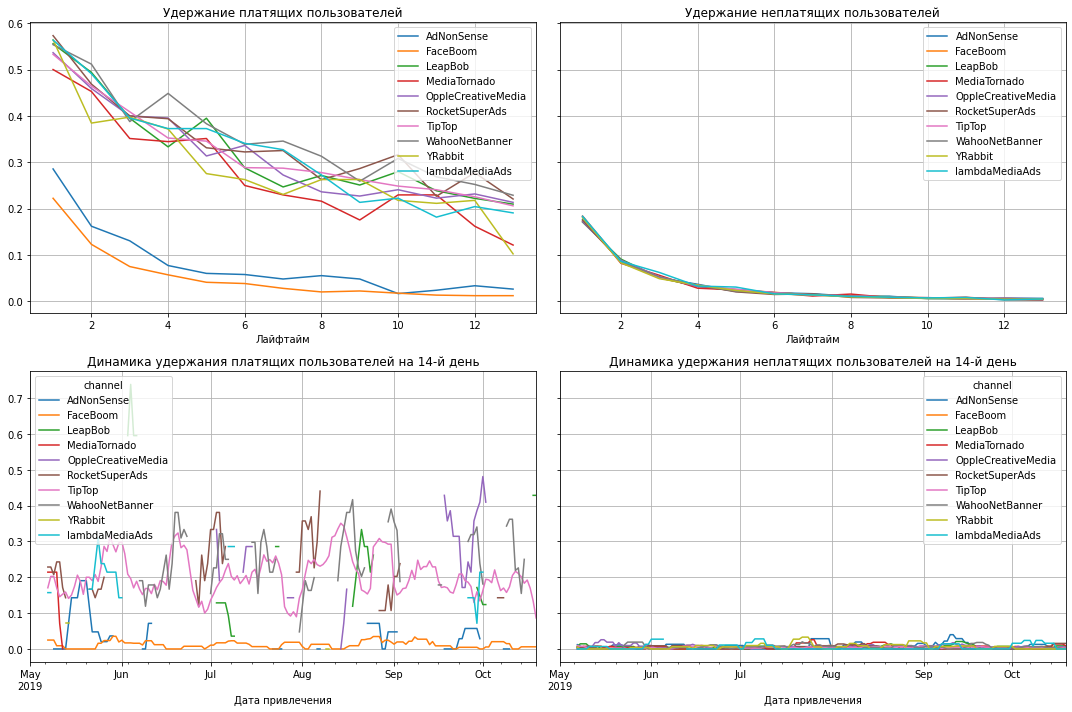

In [39]:
# смотрим конверсию с разбивкой по каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles1, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В части каналов привлечения с учетом небольшого САС можно выделить `хорошую конверсию lambdaMediaAds  и AdNonSense`. Неплохо сработала `рекламная компания lambdaMediaAds в июне` (нужно поднять информацию, что за способ привлечения использовался).
Но вот `с удержанием у AdNonSense` не так уж все замечательно - оно на уровне FaceBoom. Удержание пользователей, пришедших из других каналов, примерно на одном уровне.


Таким образом, неудивительно, что компания терпит убытки. `Большая часть финансирования` рекламных кампаний была направлена на два канала привлечения - FaceBoom и TipTop, но они не приносят достаточный уровень дохода для покрытия рекламных расходов. Если возможно, стоит пересмотреть модель оплаты рекламных компаний этих двух источников трафика, но скорее нужно обратить внимание на другие каналы - например можно `выделить lambdaMediaAds` как канал с низкой стоимостью рекламы и `достойным уровнем окупаемости`.

В части выбора страны, на которую направлены основные рекламные кампании, также необходимо пересмотреть свой выбор. Следует не только изменить рекламный источник в США, но и обратить больше внимания на другие регионы. У приложения больше всего пользователей из США, но тем не менее удержание у них очень низкое , соответственно лучше рассмотреть европейский рынок как источник привлечения новых пользователей. 

### Выводы

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

Мы получили данные по пользователям приложения, их покупкам и расходам на рекламу за полгода, начиная с мая 2019г. Данные представлены пользователями из 4х стран - Франции, Германии, Великобритании и США. Больше всего платящих пользователей в США, и `доля платящих` в США самая высокая - 6,9%. А вот самая низкая доля платящих пользователей на  момент анализа  во Франции - 3,8%, привлеченных же пользователей меньше всего в Германии - 14981 уникальный посетитель и 616 платящих соотвественно. Основная аудитория приложения - это `пользователи айфонов` (54479 чел.). Среди андроид-устройств 35тыс.пользователей. Меньше всего пользователей ПК и Mac по 30тыс. соответственно.

Всего у приложения `11 источников` привлечения пользователей, включая органический приток. Общие `расходы на рекламу за полгода` составили 105 тыс.у.е., самое большое `финансирование получили` рекламные кампании в TipTop(55 тыс.у.е.) и FaceBoom (32 тыс.у.е.). Расходы на FaceBoom были примерно одинаковы на протяжении всего периода, а вот `расходы` на рекламные компании TipTop постонно прогрессировали.  У TipTop и `самая высокая стоимость привлечения`, САС привелечения через этот канал в среднем составляет 2,8 у.е. Из финансовых результатов компании очевидно, что есть просчеты с выбором маркетинговой модели или источников привлечения. `Пожизненная ценность клиента на 14 день` составляет менее 1 у.е, показатель колеблется о 0,8 до 1 у.е в течении рассматриваемого периода. А `стоимость привлечения пользователей` достигла уже 1.3 у.е. в среднем по всем каналам. Именно поэтому коэффициент окупаемости менее 1, а динамика ROI имеет нисходящую тенденцию.

К концу жизненного цикла `конверсия составляет 8%`. Самая высокая конверсия наблюдалась в середине июня. К концу года `упало удержание платящих` пользователей примерно до 10%, несмотря на `растущие расходы на рекламу`. В первые дни удержание платящих достигает 35%, а к 8 лайфтайму составляет 15%. Доход растет по всем типам устройств, но в меньшей степени  на ПК, но и расходы на привлечение данных пользователей не изменились. Рекламные кампании основном касались Mac и айфонов. За исследуемый период только пользователи на ПК окупились, но к концу года и по ним получился убыток.

Как ранее отмечали, основные усилия были направлены на `пользователей из США` (основные и самые многочисленные пользователи приложения). Доходы от пользователей из США  растут в течении жизненного цикла, но в динамике не превышают 1.2 у.е. на клиента. Стоимость привлечения же выросла до 1.8 у.е. Пользователи этого региона единственные, кто `не окупается` к концу двухнедельного цикла в отличие от европейского сегмента. Даже пользователи из Германии, которые в начале исследуемого периода приносили убытки, на протяжении полугодия пересекли точку безубыточности.

Пользователи, пришедшие через `lambdaMediaAds`  на 14 день приносят `самый высокий доход` (LTV составяет 1.75 у.е.).Дорогостоящий с точки зрения рекламы TipTop на втором месте - LTV 1.5 у.е. в среднем. В результате самые дорогие с точки зрения стоимости рекламы и общих затрат на рекламу каналы (TipTop и FаceBoom) не окупаются даже на 14 день. `Успешны` были расходы на рекламу в `YRabbi`t, в середине июля -данный канал привлечения имеет лучшие показатели ROI за полгода. Неплохая `рентабельность у lambdaMediaAds и MediaTornado`.

 Таким образом, для дальнейших рекламных кампаний необходимо `обратить внимание на пользователей европейского сегмента` (например, из Германии), и вкладывать деньги не только в рекламу на айфон и mac, но и больше работать на сегмент андроид-устройств и ПК. Из рекламных каналов стоит обратить внимание на относительно недорогие, но с неплохой конверсией и удержанием, как `lambdaMediaAds (как приоритетный)`, WahooNetBanner, RocketSuperAds, MediaTornado, YRabbit, и меньше вкладывать в FaceBoom, TipTop, а также AdNonSense.